In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import heapq

In [2]:
def dijkstra(grafo, origem):
    # distâncias iniciais: infinito
    dist = {v: float('inf') for v in grafo}
    dist[origem] = 0

    # para reconstruir o caminho depois
    anterior = {v: None for v in grafo}

    # fila de prioridades: (distância, nó)
    fila = [(0, origem)]

    while fila:
        atual_dist, atual = heapq.heappop(fila)

        # ignorar se encontramos caminho melhor
        if atual_dist > dist[atual]:
            continue

        # verificar vizinhos
        for vizinho, peso in grafo[atual].items():
            nova_dist = atual_dist + peso

            if nova_dist < dist[vizinho]:
                dist[vizinho] = nova_dist
                anterior[vizinho] = atual
                heapq.heappush(fila, (nova_dist, vizinho))

    return dist, anterior


def menor_caminho(anterior, destino):
    caminho = []
    atual = destino

    while atual is not None:
        caminho.insert(0, atual)
        atual = anterior[atual]

    return caminho

In [3]:
grafo = {
    "São Paulo": {"Campinas": 99, "Rio de Janeiro": 430, "Curitiba": 408},
    "Campinas": {"São Paulo": 99, "Ribeirão Preto": 217, "Belo Horizonte": 490},
    "Ribeirão Preto": {"Campinas": 217, "Uberaba": 110},
    "Rio de Janeiro": {"São Paulo": 430, "Juiz de Fora": 184, "Vitória": 520},
    "Juiz de Fora": {"Rio de Janeiro": 184, "Belo Horizonte": 260},
    "Belo Horizonte": {"Juiz de Fora": 260, "Campinas": 490, "Uberlândia": 540},
    "Vitória": {"Rio de Janeiro": 520, "Belo Horizonte": 524, "Salvador": 1200},
    "Curitiba": {"São Paulo": 408, "Joinville": 130, "Florianópolis": 300},
    "Joinville": {"Curitiba": 130, "Florianópolis": 180},
    "Florianópolis": {"Joinville": 180, "Curitiba": 300, "Porto Alegre": 470},
    "Porto Alegre": {"Florianópolis": 470, "Pelotas": 260},
    "Pelotas": {"Porto Alegre": 260},
    "Uberlândia": {"Belo Horizonte": 540, "Goiânia": 350, "Uberaba": 110},
    "Uberaba": {"Ribeirão Preto": 110, "Uberlândia": 110},
    "Goiânia": {"Uberlândia": 350, "Brasília": 210},
    "Brasília": {"Goiânia": 210, "Belo Horizonte": 740},
    "Salvador": {"Vitória": 1200}
}

origem = "São Paulo"
destino = "Uberlândia"

dist, anterior = dijkstra(grafo, origem)
caminho = menor_caminho(anterior, destino)

print("Menor distância de", origem, "até", destino, "=", dist[destino])
print("Caminho:", " -> ".join(caminho))

Menor distância de São Paulo até Uberlândia = 536
Caminho: São Paulo -> Campinas -> Ribeirão Preto -> Uberaba -> Uberlândia


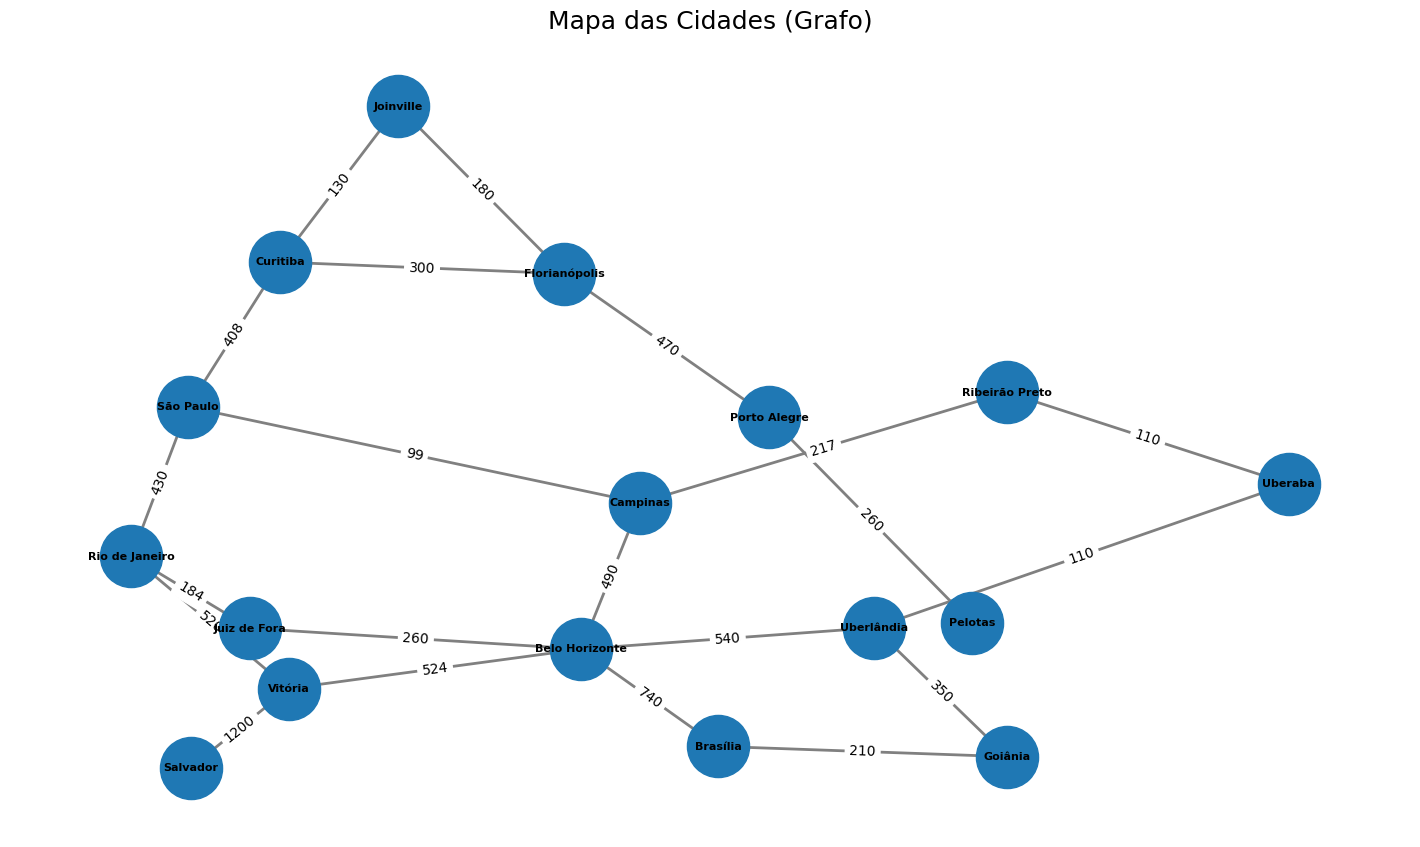

In [4]:
# Criar grafo
G = nx.Graph()

for u in grafo:
    for v, w in grafo[u].items():
        G.add_edge(u, v, weight=w)

# Aumenta o tamanho da figura
plt.figure(figsize=(14, 8))

# Layout mais espaçado
pos = nx.spring_layout(G, seed=42, k=0.8)  

# Desenha o grafo com nós maiores e texto maior
nx.draw(
    G, pos,
    with_labels=True,
    node_size=2000,
    font_size=8,
    font_weight='bold',
    width=2,
    edge_color="gray"
)

# Rótulos das arestas maiores
labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels, font_size=10)

plt.title("Mapa das Cidades (Grafo)", fontsize=18)
plt.axis("off")
plt.show()